## FUNCIONES

In [11]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D


def angulos_iniciales(thetamax, phimax = 0):
    '''
    Función para generar los angulos iniciales desde el origen de coordenadas, prefijamos el angulo phi en 
    0 para trabajar en el plano YZ hasta que funcione bien la cosa
    '''
    
    theta_inicial = random.uniform(-thetamax,thetamax)
    phi_inicial = random.uniform(0,phimax)
    return theta_inicial, phi_inicial

def coor_inc_material(theta, phi, distancia_fuente_material):
    '''
    Coordenadas del punto de incidencia en el material. 

    theta: ángulo theta de la trayectoria inicial
    phi: ángulo phi de la trayectoria inicial 
    distancia_fuente_material: distancia entre la fuente de fotones y el material absorbente 

    En esta primera interacción los ángulos no cambian
    '''

    costheta = np.cos(theta)
    sentheta = np.sqrt(1-costheta**2)
    tantheta = sentheta/costheta

    z = distancia_fuente_material
    x = z * tantheta * np.cos(phi)
    y = z * tantheta * np.sin(phi)

    return x, y, z

def recorrido_libre_medio(a):
    '''
    Recorrido libre medio de un fotón dentro de un material con un coeficiente de atenuación a. Es equivalente 
    a decir que es la distancia que recorre un fotón hasta interaccionar

    a: coeficiente de atenuación
    '''

    x = -1/(a * np.log(random.random()))
    return x

def coordenadas_material(z_0, theta_0, phi_0, recorrido_libre_medio):
    '''
    Función para cambiar la trayectoria del fotón

    z_0: coordenada z
    theta_0: angulo plano ZY
    phi_0: angulo de revolución
    recorrido_libre_medio: modulo de la distancia recorrida dentro del material antes de interaccionar
    '''
    theta_nueva = -theta_0
    phi_nuevo = -phi_0

    sentheta = np.sin(theta_nueva)
    costheta = np.cos(theta_nueva)
    z_nuevo = z_0 + recorrido_libre_medio * costheta
    x_nuevo = recorrido_libre_medio * sentheta * np.cos(phi_nuevo)
    y_nuevo = recorrido_libre_medio * sentheta * np.sin(phi_nuevo)

    return x_nuevo, y_nuevo, z_nuevo, theta_nueva, phi_nuevo


## PROGRAMA PRINCIPAL

          x    y         z     theta  phi
0  0.000000  0.0  0.000000  0.000000  0.0
1  1.840434  0.0  2.000000  0.743873  0.0
1 -1.167723  0.0  3.268965 -0.743873 -0.0
2  1.167723  0.0  4.537929  0.743873  0.0
3 -1.167723  0.0  5.806894 -0.743873 -0.0
4  1.167723  0.0  7.075859  0.743873  0.0
5 -1.167723  0.0  8.344824 -0.743873 -0.0
1.7244851046833944


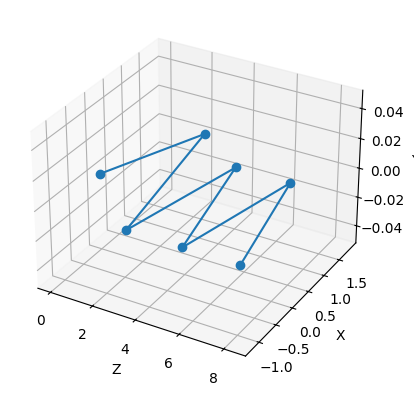

In [12]:
thetamax = np.pi/3
phimax = random.uniform(-np.pi,np.pi)
distancia_fuente_material = 2
grosor_material = 6
rho_mu = 0.1 # coeficiente de atenuación másico

theta_0, phi_0 = angulos_iniciales(thetamax)

x_0, y_0, z_0 = coor_inc_material(theta_0, phi_0, distancia_fuente_material)

#modulo_trayectorias = recorrido_libre_medio(rho_mu)
modulo_trayectorias = random.uniform(1,2)

z = distancia_fuente_material


data = {
    'x': [0, x_0],
    'y': [0, y_0],
    'z': [0, z_0],
    'theta': [0, theta_0],
    'phi': [0, phi_0]
}

# Crear un DataFrame a partir del diccionario con un índice específico
df = pd.DataFrame(data)

z = distancia_fuente_material
i = 1

while z < distancia_fuente_material + grosor_material:
    '''
    En este bucle aplicamos la función para calcular las nuevas trayectorias dentro del material hasta 
    que el fotón sale del material.
    '''
    z_antiguo = df.iloc[i]['z']
    theta_antiguo = df.iloc[i]['theta']
    phi_antiguo = df.iloc[i]['phi']

    x_nuevo, y_nuevo, z_nuevo, theta_nueva, phi_nuevo = coordenadas_material(z_antiguo, theta_antiguo, phi_antiguo, modulo_trayectorias)

    nuevo_punto_de_interaccion = {
    'x': [x_nuevo],
    'y': [y_nuevo],
    'z': [z_nuevo],
    'theta': [theta_nueva],
    'phi': [phi_nuevo]
    }

    # Crear un DataFrame a partir del diccionario con un índice específico
    nueva_fila = pd.DataFrame(nuevo_punto_de_interaccion, index=[i])  # Utiliza el índice 'i' para la nueva fila

    # Concatenar la nueva fila al DataFrame existente
    df = pd.concat([df, nueva_fila])
    z = z_nuevo
    i+=1


print(df)
print(modulo_trayectorias)

# Crear una figura y un eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la trayectoria en 3D
ax.plot(df['z'], df['x'], df['y'], marker='o', linestyle='-')

# Etiquetas de los ejes
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

# Mostrar el gráfico
plt.show()


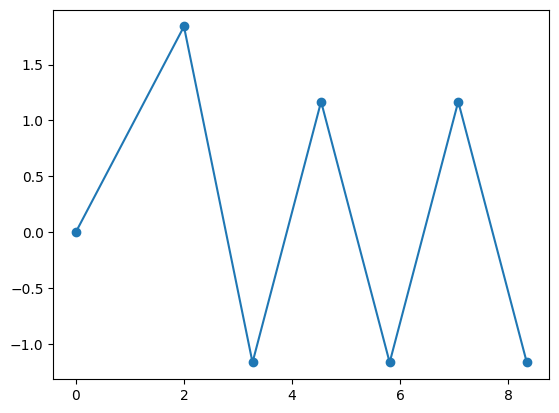

In [13]:

z = df.iloc[1]['z']
theta = df.iloc[1]['theta']
phi = df.iloc[1]['phi']

x_nuevo, y_nuevo, z_nuevo, theta_nueva, phi_nuevo = coordenadas_material(z, theta, phi, modulo_trayectorias)

plt.plot(df['z'], df['x'], marker='o', linestyle='-')
plt.show()

